# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [40]:
# Import statments for packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling



Before start, let's see the head of our data frame.

In [41]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### What is the size of the dataframe? 

Using the 'info' method, we can view the relevant information about our DataFrame.

In [42]:
df.info()

#also df.shape would be more straightforward to show the number of rows and columns in the entire DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values

In [43]:
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

df.dtypes
#Shows the columns datatypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [44]:
df.isnull().sum()

#Identify missing values represented as NaN within the DF

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [45]:
df.shape

#Display the number of rows and columns in the entire DataFrame.

(110527, 14)

In [46]:
df.describe()

#statistic summary of the dataframe

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


If we examine the minimum value in the 'Age' column, we observe a value of -1. It is highly improbable that someone is -1 years old. Therefore, this appears to be an erroneous entry. I will filter this DataFrame, creating a 'minage' series, to closely investigate this row.

In [47]:
minage = df[df['Age'] == -1]
minage

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


It seems this is indeed an erroneous entry. To avoid further issues when analyzing the rest of the DataFrame, I will remove this row with the negative age during the data cleaning phase.

In [48]:
df.nunique()

#To count the unique values in each column of the dataframe.

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [49]:
df['Gender'].value_counts()

#count the values for a specific row

F    71840
M    38687
Name: Gender, dtype: int64

#### Checking Duplicates ####

In the next code cells, I will count the duplicated values within the 'Patient IDs' column and also count the unique values.

Furthermore, to analyze the relationship between the 'Patient ID' column and the 'No-show patients' column, I will implement code to sum the total of duplicated patient IDs and 'No-show' values. Both rows will be considered duplicates if they have the same values in both the 'Patient ID' and 'No-show' columns.


In [50]:
df['PatientId'].nunique()

#count the unique values in each PatientId column

62299

The total unique values in the Patient ID column is 62,299

In [51]:
df['PatientId'].duplicated().sum()

#sum the duplicated patient ID values

48228

There is 48,228 duplicated patient ID values.

In [52]:
df.duplicated(['PatientId', 'No-show']).value_counts()

False    71817
True     38710
dtype: int64

38,710 rows in the dataset where the combination of "PatientId" and "No-show" is true repeats.


### Data Cleaning
 

First, let's standardize the header names, correcting the typo at 'hipertension' and removing the dash at No-show, using a '_'.

In [53]:
df.rename(columns={'Hipertension':'Hypertension', 'No-show': 'No_Show'},inplace=True) 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Let's drop the -1 age value row.

In [54]:
drop_index = df[df['Age'] == -1].index
df.drop(index=drop_index, inplace=True)

#or we can use the index number in a simple drop formula
#df.drop(index=99832, inplace=True)

In [55]:
df.describe()

#To verify if the negative Age value has been eliminated

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Earlier, I identified some duplicate entries. I will now proceed to remove them.

In [56]:
df.drop_duplicates(['PatientId', 'No_Show'],inplace=True)
df.shape

(71816, 14)

After dropping the duplicates, we observe a smaller number of rows compared to the previous row count in my DataFrame shape under the 'Data Wrangler' phase. The initial shape was (110527, 14), and it is now (71816, 14), resulting in a difference of exactly 38711 rows. This aligns with the 38710 duplicates counted, as I removed the negative age column prior to dropping the duplicates.

Furthermore, some columns appear unnecessary for the subsequent exploratory data analysis phase, such as 'PatientId'
and 'AppointmentID'. I initially planned to retain 'AppointmentID' as it represents the most granular dimension across the table, containing only unique values. This conclusion can be drawn by comparing the results of the previous nunique() method with the count() method. When examining solely the 'AppointmentID' column, we observe that both methods yield identical totals, indicating that all 110527 entries in this column possess unique values.

However, unique values can be effectively represented by the index number. Consequently, I have decided to remove the 'AppointmentID' field as well.

In [57]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### How do age and an SMS reminder affect patient attendance at medical appointments?

Let's create two groups: one for the total number of people who attended their appointments and another for those who did not attend.

In [58]:
Attend=df.No_Show=='No'
Noattend=df.No_Show=='Yes'
df[Attend].count(),df[Noattend].count()

(Gender            54153
 ScheduledDay      54153
 AppointmentDay    54153
 Age               54153
 Neighbourhood     54153
 Scholarship       54153
 Hypertension      54153
 Diabetes          54153
 Alcoholism        54153
 Handcap           54153
 SMS_received      54153
 No_Show           54153
 dtype: int64,
 Gender            17663
 ScheduledDay      17663
 AppointmentDay    17663
 Age               17663
 Neighbourhood     17663
 Scholarship       17663
 Hypertension      17663
 Diabetes          17663
 Alcoholism        17663
 Handcap           17663
 SMS_received      17663
 No_Show           17663
 dtype: int64)

Attended: 88,207
No Attended: 22,319

Now let's compare the mean of each group. I will focus solely on the 'Age' and 'SMS' columns, narrowing down the analysis to the most relevant fields for comparing both groups. My objective is to **determine if age can influence attendance levels, as well as the impact of receiving an SMS reminder.**

In [59]:
mean_attend_age = df[Attend]['Age'].mean()
mean_attend_sms = df[Attend]['SMS_received'].mean()


mean_noattend_age = df[Noattend]['Age'].mean()
mean_noattend_sms = df[Noattend]['SMS_received'].mean()

print("Mean age for attend:", mean_attend_age)
print("Mean sms for attend:", mean_attend_sms)
print("Mean age for no attend:", mean_noattend_age)
print("Mean sms for no attend:", mean_noattend_sms)

Mean age for attend: 37.22916551252931
Mean sms for attend: 0.29723191697597545
Mean age for no attend: 34.37626677234898
Mean sms for no attend: 0.45309403838532525


Visualizing this difference would be good. So, I created a list containing the means and subsequently generated a bar chart based on this list.

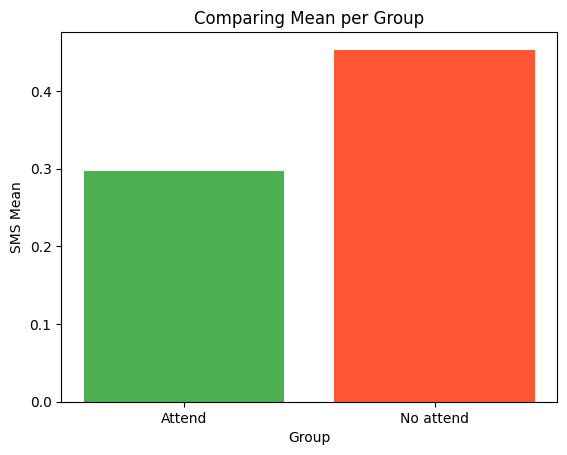

In [60]:
means = [mean_attend_sms, mean_noattend_sms]

plt.bar(['Attend', 'No attend'], means, color=['#4CAF50', '#FF5733'])
plt.xlabel('Group')
plt.ylabel('SMS Mean')
plt.title('Comparing Mean per Group')
plt.show()

It is clear that the 'no-show' group received more SMS reminders for their medical appointments than the group that attended their appointments. This highlights the need to **improve the SMS reminder system.**

Moving forward, a visualization depicting the difference in attendance grouped by age will demonstrate *how age influences those who attended medical appointments versus those who did not.*

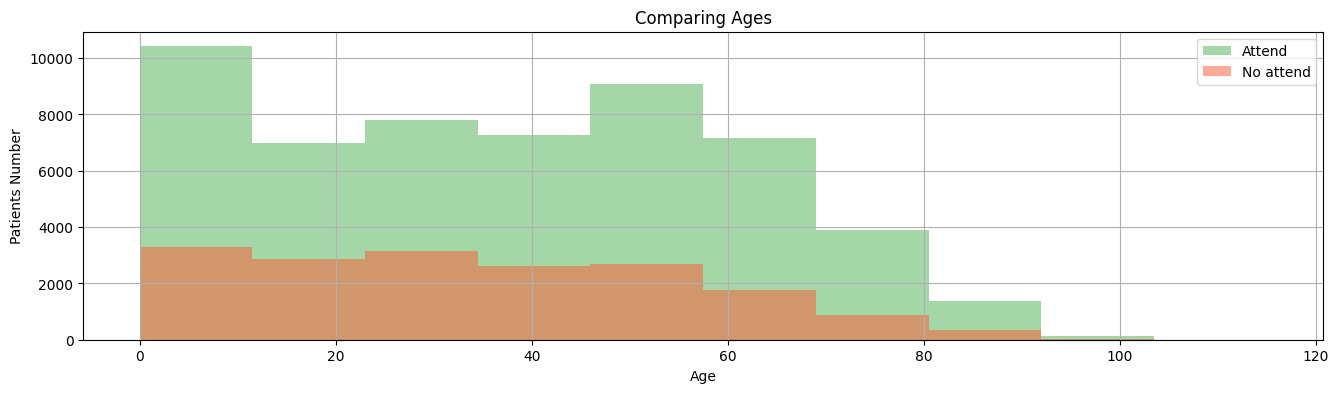

In [61]:
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,4])
    df[col_name][Attend].hist(alpha=.5,bins=10,color='#4CAF50',label='Attend')
    df[col_name][Noattend].hist(alpha=.5,bins=10,color='#FF5733',label='No attend')
    plt.legend();
    plt.title('Comparing Ages')
    plt.xlabel('Age')
    plt.ylabel('Patients Number');
attendance(df,'Age',Attend,Noattend)

By creating a function named 'attendance', I can compare both groups by age. Observing the histogram, we can notice that the majority of patients between 0 and 10 years old rarely miss their medical appointments, likely due to the presence of an older responsible individual who brings them to the doctor.

### Which month has the most missing appointments?

The answer to this question will help determine whether there is a relationship between missed appointments and appointment volume. Additionally, it will allow us to explore trends.

To do this, the appointment day column will be converted to date time. Also, to see the monthly results, we will need to use the to_period function to convert the date object into a period with a specific frequency, in this case, monthly. 

<AxesSubplot: xlabel='AppointmentMonth'>

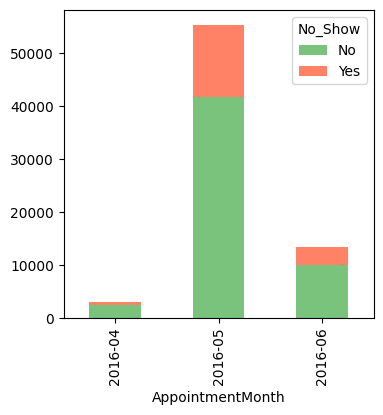

In [62]:
#convert date column to date time
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None) #to drop the timezone information avoiding error messages

df['AppointmentMonth'] = df['AppointmentDay'].dt.to_period('M') #converting a date such as 2016-04-29 to the month, 2016-04, since I selected the 'M' parameter, for month

#group by each AppointmentMonth and no_show unique combination, calculating the size of each group, using unstack to convert no_show to yes and no
# using astype(int) to convert the values to integers
monthly_counts = df.groupby(['AppointmentMonth', 'No_Show']).size().unstack(fill_value=0).astype(int)

#creating a stacked bar chart with pandas
monthly_counts.plot(
    kind='bar', #creating the bars
    stacked=True, #stacked bar*
    color=['#4CAF50', '#FF5733'],  # Colors for Attended and Missed
    figsize=(4, 4),                # Size of the figure
    alpha=0.75                     # Transparency
)



To clearly see what is happening in the monthly_counts table, we can use the head method to view it:

In [63]:
monthly_counts.head()

No_Show,No,Yes
AppointmentMonth,,
2016-04,2418,600
2016-05,41764,13612
2016-06,9971,3451


### The stacked bar chart was helpful. However, how many numbers are there within each monthly period for no-shows and shows?

To address this question, we will need to recur to a simple Python 'for' loop with iloc, and MatplotLib for visualization. 

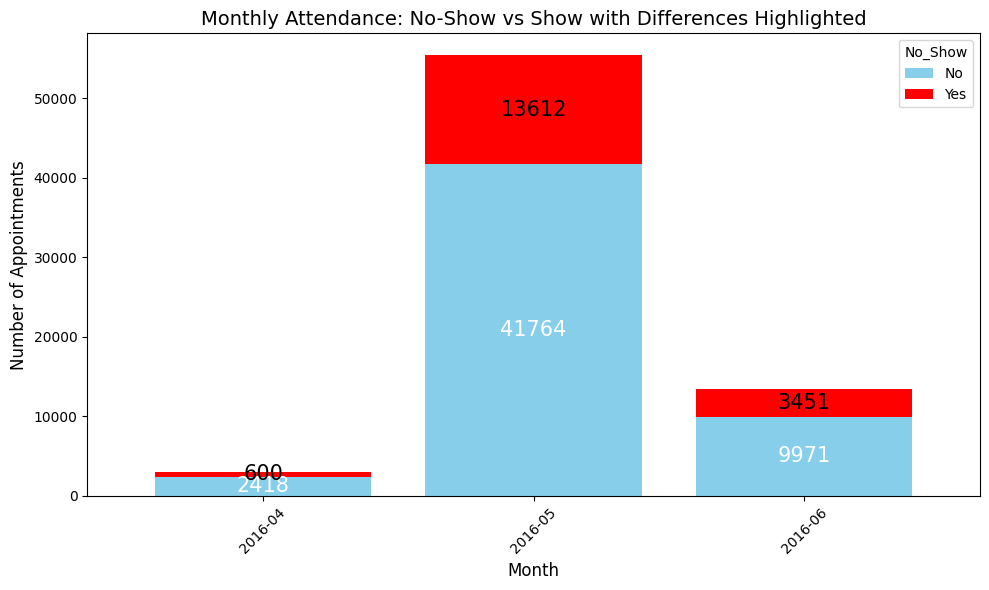

In [64]:
# Plot the stacked bar chart. This creats a bar chart from the previous dataframe, monthly_costs, storing in ax.
ax = monthly_counts.plot(kind='bar', stacked=True, color=['skyblue', 'red'], figsize=(10, 6), width=0.8) 

# Loop over each month to annotate each bar
for month in range(len(monthly_counts)):
    # Get the values for "Show" and "No-show"
    show = monthly_counts.iloc[month, 0]
    no_show = monthly_counts.iloc[month, 1]

    # Annotate "Show" (bottom segment)
    plt.text(x=month, y=show / 2, s=f'{show}', ha='center', va='center', color='white', fontsize=15)

    # Annotate "No-show" (top segment)
    plt.text(x=month, y=show + no_show / 2, s=f'{no_show}', ha='center', va='center', color='black', fontsize=15)
   

# Customize labels and title
plt.title('Monthly Attendance: No-Show vs Show with Differences Highlighted', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

With this graph, we can see the same stacked bars, but with the values displayed from the monthly_counts DataFrame. This is useful for visualizing the difference in numbers between each group: those who attended the medical appointments and those who did not, broken down by month. However, we can dive deeper and try to predict the answer to my next question:

### Is there a way to predict the number of patients who will miss their appointments?

We can do this using a straight line in linear regression, which is not so elaborated, but give us a prediction. I will use the formula y = mx + c where m represents how the number of missed appointments changes with each passing month, and c the predicted number of missed appointments at month = 0.

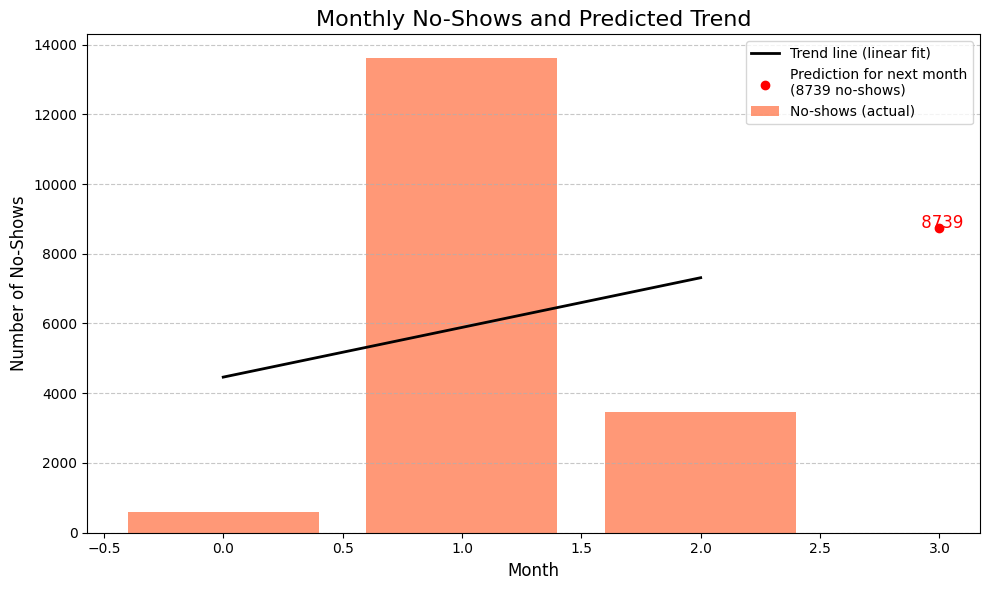

In [65]:
months = np.arange(len(monthly_counts))  # creating an array of integers starting from 0 to the number of months in monthly_counts df.
no_shows = monthly_counts.iloc[:, 1].values  # iloc will access the second column (index 1) of monthly_columns df, 
#containing the no show counts for each month, using .values to convert into a numpy array, to use in mathematical operations.

# Fit a linear model (y = mx + c) using numpy polyfit
coefficients = np.polyfit(months, no_shows, 1)  
m, c = coefficients # m is the slope of the line, how the number of missed appointments changes per month. C = intercept of the line

# Predict no-shows for the next month
next_month = len(monthly_counts)  # Calculates the index for the next month
predicted_no_shows = m * next_month + c #uses the linear equation y = mx + c to predict the number of no shows for next month
trend_line = m * months + c #for each month, calculates the predict number of no-shows, according to the trend
plt.figure(figsize=(10, 6))

# Plot actual data
plt.bar(months, no_shows, color='#ff6d3d', alpha=0.7, label="No-shows (actual)")

# Plot the trend line
plt.plot(months, trend_line, color='#000000', linewidth=2, label="Trend line (linear fit)")

# Add the predicted point for the next month
plt.scatter(next_month, predicted_no_shows, color='red', zorder=5, label=f"Prediction for next month\n({predicted_no_shows:.0f} no-shows)")
#using .0f to round the float to 8739


plt.text(next_month, predicted_no_shows, f"{predicted_no_shows: .0f}", color='red', fontsize=12, ha='center')


plt.title("Monthly No-Shows and Predicted Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of No-Shows", fontsize=12)


plt.legend()


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interesting! Now we have a prediction of the patients who will miss their appointments next month, with an estimated total of 8,739 patients.

### And what is the overall proportion of Attendance vs No Show appointments? 

We can discover this with the donut chart bellow:

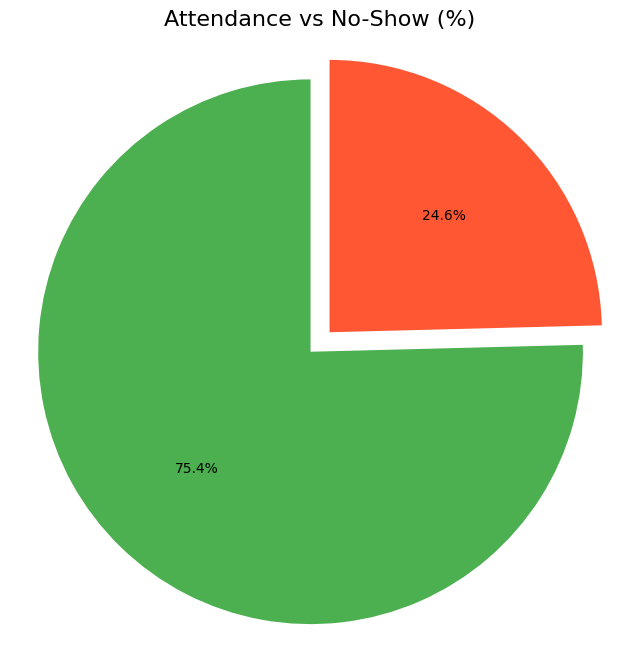

In [66]:
attendance_counts = df['No_Show'].value_counts()

labels = attendance_counts.index.tolist() 
sizes = attendance_counts.values  # values for the donut chart
colors = ['#4CAF50', '#FF5733'][:len(labels)]  
explode = [0.1 if label == 'Yes' else 0 for label in labels]  # Point out No-Show values

# Donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes, 
    autopct='%1.1f%%',  # Show percentage
    startangle=90, 
    colors=colors, 
    explode=explode
)
plt.title('Attendance vs No-Show (%)', fontsize=16)
plt.axis('equal')  # Makes the circle
plt.show()

# Conclusions

## Summary of Findings and Results

#### **1**. Analysis of Age and SMS Reminders: 

* The dataset contains information on patients' attendance and no-shows at medical appointments, with columns such as Age, SMS_received, and No_Show.

* The analysis revealed that the average age for attendees is higher (37.23 years) compared to the non-attendees (34.38 years), suggesting that older patients are more likely to attend appointments.

* The group of patients who attended the appointment received fewer SMS reminders (29.7%) compared to those who missed their appointments (45.3%).

* A bar chart clearly illustrated this difference, highlighting that those who missed their appointments received more SMS reminders.

#### **2**. Impact of Age on Attendance: 

* A histogram comparing the ages of patients who attended versus those who did not revealed that younger patients, especially those under 10 years old, are less likely to miss appointments. This might be attributed to parental or guardian supervision, which ensures attendance.

* Additionally, patients aged 48-59 have the second-lowest rate of missed appointments. This age group might be more proactive about preventive care, such as screenings and checkups, which are often covered by the Brazilian public healthcare system. 

#### **3**. Month-wise Distribution of Attendance: 

* A monthly breakdown of attendance vs. no-shows indicated that May 2016 had the highest number of missed appointments (13,612), while the total number of appointments also varied across months.

* A stacked bar chart demonstrated this distribution visually, with the number of no-shows and attendees stacked together for each month.

#### **4**. Predicting Future No-Shows:

* Using linear regression, a trend line was fitted to the monthly no-show data. The model predicted that approximately 8,739 patients would miss their appointments in the next month, based on historical trends.

* This prediction was displayed with both actual data and the trend line on the graph, showing how the number of no-shows is expected to evolve.

#### **5**. Overall Proportion of Attendance vs. No-Show:

* A donut chart summarized the proportion of attended versus missed appointments, showing the attendance rate as a percentage of the total.

# Limitations

#### Bias in SMS Reminders 
* The analysis suggests that patients who did not attend appointments received more SMS reminders. However, this could indicate that the reminder system is being used more for high-risk (likely to miss) patients, potentially skewing the data. It may be useful to explore whether SMS reminders themselves are ineffective or if they are just being targeted to a specific group.

In [71]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 582270 bytes to Investigate_a_Dataset.html
